In [8]:
% matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.io
from pprint import pprint

In [24]:
sns.set_style('white')
colors = np.tile(['darkred','black'], 11)
name = 'RPS'

In [5]:
snpsloc = pd.read_csv('/storage/gablab001/data/genus/current/structured/cog-gen-bayes/data/100k_snp_loc_pval.csv')
tp = '/storage/gablab001/data/genus/current/structured/cog-gen-bayes/output_bf'
toplot = scipy.io.loadmat(os.path.join(tp, '100ksnp_{}domainAvgZ.mat'.format(name)))
snpsloc['PIP'] = toplot['PIP']
snpsloc['log10PIP'] = np.log10(snpsloc['PIP'])
df = snpsloc.copy()
df.columns = ['chromosome', 'pvalue', 'snpid', 'PIP', 'log10PIP']
df['chrnum'] = [int(i[3:]) for i in df.chromosome]
df = df.sort_values('chrnum')
df['ind'] = range(len(df))
grouped = df.groupby(('chrnum'))

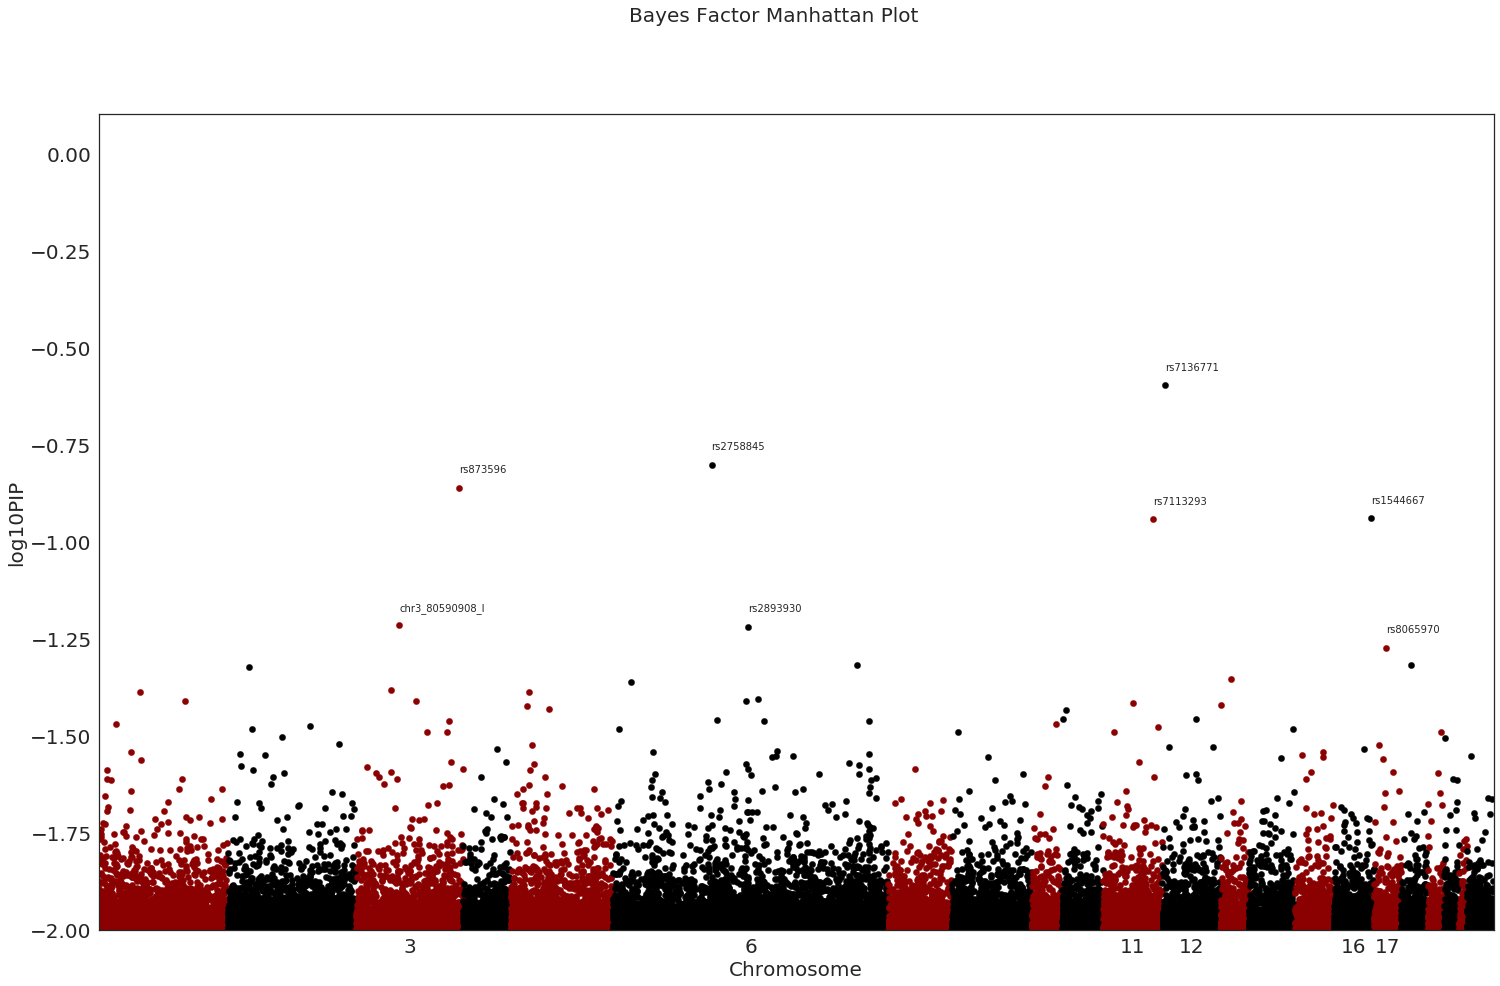

In [44]:
snp_thresh_list = []

def plot_manhattan(data, plot_name, pip_thresh):
    fig = plt.figure(figsize=(25,15))
    fig.suptitle('Bayes Factor Manhattan Plot', fontsize=20)
    ax = fig.add_subplot(111)
    x_labels = []
    x_labels_pos = []
    for num, (name, group) in enumerate(data):
        group.plot(kind = 'scatter',  x = 'ind',
                   y = 'log10PIP', colors = colors[num % len(colors)],
                   ax = ax, s=40)
        tf_vals = group['PIP'] > pip_thresh
        if np.any(tf_vals):
            x_labels.append(name)
            x_locs = group['ind'][tf_vals].values
            y_locs = group['log10PIP'][tf_vals].values
            snps = group['snpid'][tf_vals].values
            snp_thresh_list.extend(snps)
            for i in range(len(x_locs)):
                plt.annotate('{}'.format(snps[i]),
                            xy=(x_locs[i], y_locs[i]+.04), size=10)
        else:
            x_labels.append('')
        x_labels_pos.append((group['ind'].iloc[-1] - \
            (group['ind'].iloc[-1] - group['ind'].iloc[0]) / 2))
    ax.set_xticks(x_labels_pos)
    ax.set_xticklabels(x_labels)
    ax.set_xlim([0, max(group['ind'])])
    ax.set_ylim([-2, 0.1])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel('Chromosome', fontsize=20)
    plt.ylabel('log10PIP', fontsize=20)
    plt.savefig('{}_manhattan.png'.format(plot_name), bbox_inches='tight')
    #plt.close(fig)

plot_manhattan(grouped, name, .05)
np.savetxt("{}_snps_pass_thresh.txt".format(name), snp_thresh_list, fmt="%s")

In [ ]:
lower_bounds = {
    'rps':-3.8,
    'sop':-1.84,
    'spa':-2.43,
    'tvi':-2.7,
    'vlm':-4,
    'vwm':-2
}

In [25]:
snpsloc = pd.read_csv('/storage/gablab001/data/genus/current/structured/cog-gen-bayes/data/100k_snp_loc_pval.csv')
tp = '/storage/gablab001/data/genus/current/structured/cog-gen-bayes/output_bf'
toplot = scipy.io.loadmat(os.path.join(tp, '100ksnp_{}domainAvgZ.mat'.format(name)))
snpsloc['PIP'] = toplot['PIP']
snpsloc['log10PIP'] = np.log10(snpsloc['PIP'])
df = snpsloc.copy()
df.columns = ['chromosome', 'pvalue', 'snpid', 'PIP', 'log10PIP']
df['chrnum'] = [int(i[3:]) for i in df.chromosome]
df = df.sort_values('chrnum')
df['ind'] = range(len(df))
grouped = df.groupby(('chrnum'))

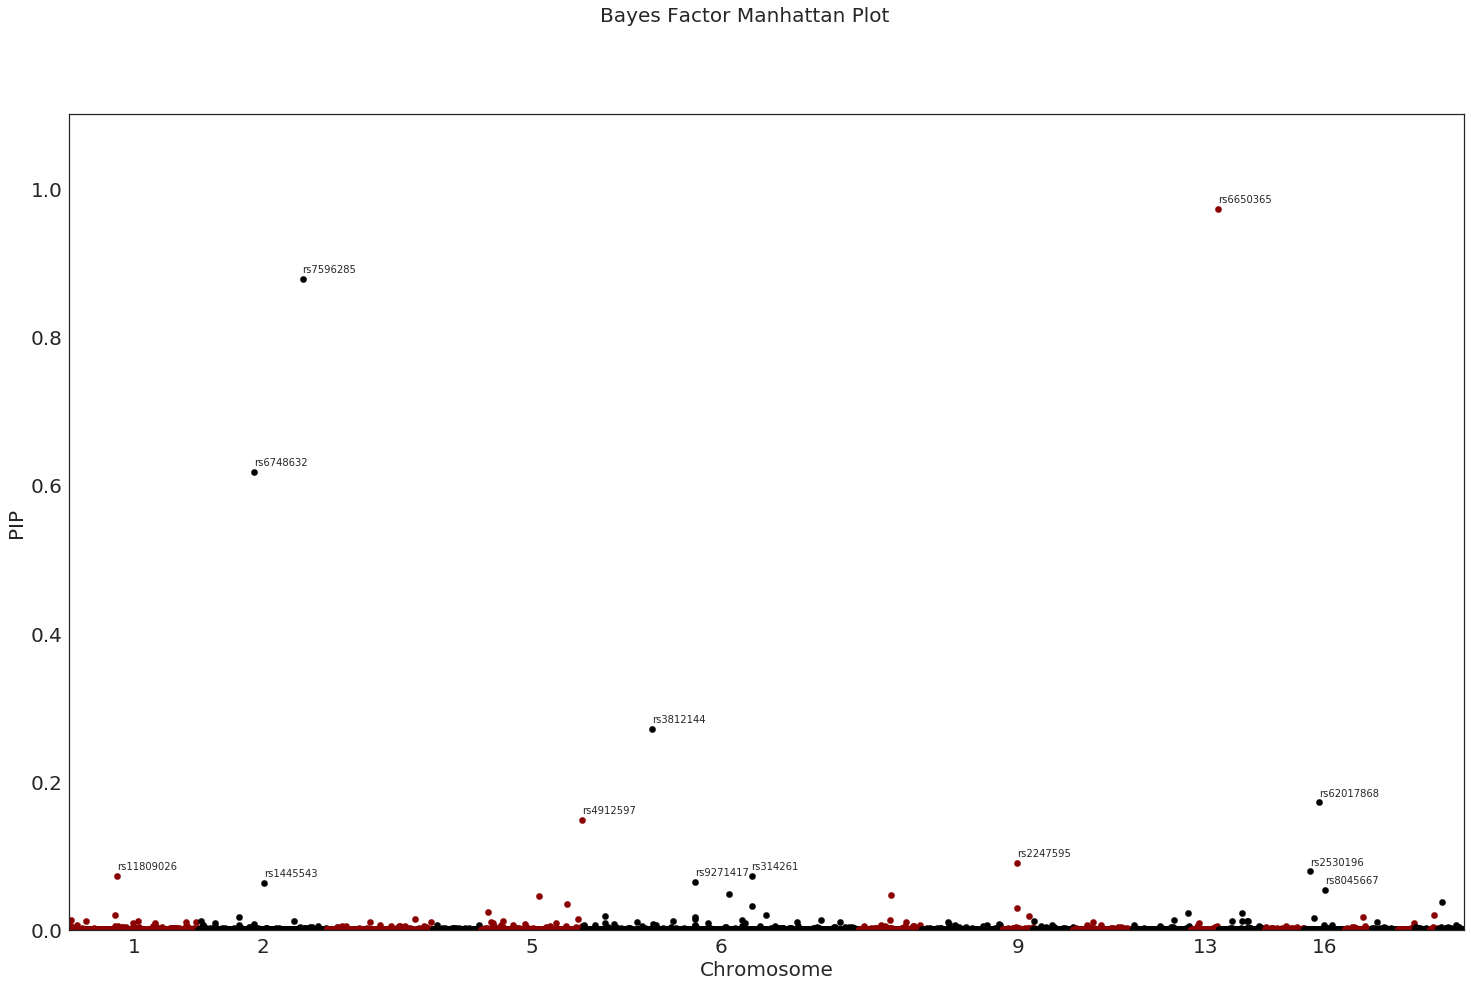

In [27]:
def plot_manhattan_nlp(data, plot_name, pip_thresh):
    fig = plt.figure(figsize=(25,15))
    fig.suptitle('Bayes Factor Manhattan Plot', fontsize=20)
    ax = fig.add_subplot(111)
    x_labels = []
    x_labels_pos = []
    for num, (name, group) in enumerate(data):
        group.plot(kind = 'scatter',  x = 'ind',
                   y = 'PIP', colors = colors[num % len(colors)],
                   ax = ax, s=40)
        tf_vals = group['PIP'] > pip_thresh
        if np.any(tf_vals):
            x_labels.append(name)
            x_locs = group['ind'][tf_vals].values
            y_locs = group['PIP'][tf_vals].values
            snps = group['snpid'][tf_vals].values
            for i in range(len(x_locs)):
                plt.annotate('{}'.format(snps[i]),
                            xy=(x_locs[i], y_locs[i]+.009), size=10)
        else:
            x_labels.append('')
        x_labels_pos.append((group['ind'].iloc[-1] - \
            (group['ind'].iloc[-1] - group['ind'].iloc[0]) / 2))
    ax.set_xticks(x_labels_pos)
    ax.set_xticklabels(x_labels)
    ax.set_xlim([-2, max(group['ind'])])
    ax.set_ylim([0, 1.1])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel('Chromosome', fontsize=20)
    plt.ylabel('PIP', fontsize=20)
    #plt.savefig('{}_e^ln_manhattan.png'.format(plot_name), bbox_inches='tight')
    #plt.close(fig)

plot_manhattan_nlp(grouped, name, .05)

In [6]:
df

,chromosome,pvalue,snpid,PIP,log10PIP,chrnum,ind
22304,chr1,1.211000e-06,rs12087992,0.000131,-3.882688,1,0
36546,chr1,1.291000e-05,rs10917846,0.000173,-3.762226,1,1
13007,chr1,5.365000e-08,rs113613310,0.000155,-3.808376,1,2
13008,chr1,5.375000e-08,rs11576997,0.000141,-3.850138,1,3
53637,chr1,5.871000e-05,rs2802839,0.000155,-3.808997,1,4
79018,chr1,2.053000e-04,rs203285,0.000162,-3.789559,1,5
13020,chr1,5.394000e-08,rs10789363,0.000138,-3.858658,1,6
79016,chr1,2.053000e-04,rs6676689,0.000571,-3.243513,1,7
79015,chr1,2.053000e-04,rs72709357,0.000138,-3.859637,1,8
79012,chr1,2.053000e-04,rs195199,0.000137,-3.863228,1,9


In [10]:
# threshold by probability, start from PIP > 0 
# increase by intervals of 5
# do this on the testing data
test_base = '/storage/gablab001/data/genus/current/structured/cog-gen-bayes/data'
pprint(os.listdir(test_base))

['matfiles',
 '100k_snp_loc_pval.csv',
 '100ksnpnames.txt',
 'GENCOGDATA.hdf',
 'N5338_ATVIdomainAvgZ.hdf',
 'N5338_NVLMdomainAvgZ.hdf',
 'N5338_NVWMdomainAvgZ.hdf',
 'N5338_RPSdomainAvgZ.hdf',
 'N5338_SOPdomainAvgZ.hdf',
 'N5338_VISPAdomainAvgZ.hdf',
 'N5338_VLMdomainAvgZ.hdf',
 'N5338_VWMdomainAvgZ.hdf',
 'cog_gen_bayes.mat',
 'eur_fam_concated.csv',
 'first_5_PCAS.eigenval',
 'first_5_PCAS.eigenvec',
 'ids.txt',
 'manhattan_plot2.png',
 'snps_locs_pvals.txt',
 'strucnames.txt']


In [77]:
import h5py
h5f = h5py.File(os.path.join(test_base, 'N5338_ATVIdomainAvgZ.hdf'), "r")
keys = h5f.keys()
h5f.close()

In [14]:
keys

[u'cog_test',
 u'cog_train',
 u'empty',
 u'fam_test',
 u'fam_train',
 u'gen_test',
 u'gen_train',
 u'pca_test',
 u'pca_train',
 u'y_test',
 u'y_train']

In [249]:
domains = {
 'N5338_ATVIdomainAvgZ.hdf':'TVI',
 'N5338_RPSdomainAvgZ.hdf':'RPS',
 'N5338_SOPdomainAvgZ.hdf':'SOP',
 'N5338_VISPAdomainAvgZ.hdf':'SPA',
 'N5338_VLMdomainAvgZ.hdf':'VLM',
 'N5338_VWMdomainAvgZ.hdf':'VWM',
}

tp = '/storage/gablab001/data/genus/current/structured/cog-gen-bayes/output_bf'
snpsloc = pd.read_csv('/storage/gablab001/data/genus/current/structured/cog-gen-bayes/data/100k_snp_loc_pval.csv')


# Data from plot
toplot = scipy.io.loadmat(os.path.join(tp, '100ksnp_{}domainAvgZ.mat'.format('RPS')))
snpsloc['PIP'] = toplot['PIP']
snpsloc['log10PIP'] = np.log10(snpsloc['PIP'])
df = snpsloc.copy()
df.columns = ['chromosome', 'pvalue', 'snpid', 'PIP', 'log10PIP']
df['chrnum'] = [int(i[3:]) for i in df.chromosome]
df = df.sort_values('chrnum')
df['ind'] = range(len(df))

#max_pip = df['PIP'].max()

r2scores=[]
#for i in np.arange(.001, max_pip, .001):
#    proba = i
 
proba = .05
df_proba = df.ix[df['PIP'] > proba, :]


# test data
r2cogdata_test = pd.read_hdf(os.path.join(test_base, 'N5338_RPSdomainAvgZ.hdf'), 'cog_test')
r2genedata_test = pd.read_hdf(os.path.join(test_base, 'N5338_RPSdomainAvgZ.hdf'), 'gen_test')
r2genedata_test.columns = ['IID'] + snpsloc.snpid.values.tolist()
gene_proba_test = r2genedata_test[df_proba.snpid]

# train data
r2cogdata_train = pd.read_hdf(os.path.join(test_base, 'N5338_RPSdomainAvgZ.hdf'), 'cog_train')
r2genedata_train = pd.read_hdf(os.path.join(test_base, 'N5338_RPSdomainAvgZ.hdf'), 'gen_train')
r2genedata_train.columns = ['IID'] + snpsloc.snpid.values.tolist()
gene_proba_train = r2genedata_train[df_proba.snpid]

# response
y_train = pd.read_hdf(os.path.join(test_base, 'N5338_RPSdomainAvgZ.hdf'), 'y_train')
y_test = pd.read_hdf(os.path.join(test_base, 'N5338_RPSdomainAvgZ.hdf'), 'y_test')

from sklearn import linear_model
from sklearn.metrics import explained_variance_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from custom import utils

clf = Pipeline([
    ('scale', StandardScaler()),
    ('lm', linear_model.RidgeCV())
])

clf.fit(gene_proba_train.values, r2cogdata_train.ix[:, 1].values)

r2 = explained_variance_score(r2cogdata_test.ix[:, 1].values, 
                              clf.predict(gene_proba_test.values))
#r2scores.append((r2 * 100, df_proba.shape[0]))
print(r2 * 100, df_proba.shape[0])

(5.175471327009717, 13)


In [250]:
df_proba

,chromosome,pvalue,snpid,PIP,log10PIP,chrnum,ind
10063,chr1,8.677000e-09,rs11809026,0.072474,-1.139815,1,3431
94649,chr2,3.426000e-04,rs6748632,0.617661,-0.209250,2,13270
26139,chr2,2.703000e-06,rs1445543,0.062778,-1.202194,2,13950
45273,chr2,3.089000e-05,rs7596285,0.878102,-0.056455,2,16729
32133,chr5,7.539000e-06,rs4912597,0.147898,-0.830038,5,36781
66643,chr6,1.209000e-04,rs3812144,0.271388,-0.566410,6,41802
10062,chr6,8.675000e-09,rs9271417,0.064909,-1.187694,6,44872
19832,chr6,6.015000e-07,rs314261,0.072855,-1.137538,6,48915
74892,chr9,1.741000e-04,rs2247595,0.090007,-1.045721,9,67923
80538,chr13,2.169000e-04,rs6650365,0.972693,-0.012024,13,82343


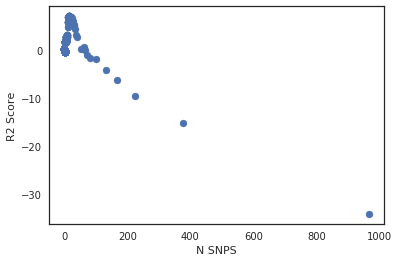

In [238]:
plt.scatter(
    [i[1] for i in r2scores],
    [i[0] for i in r2scores]
)
plt.xlabel("N SNPS")
plt.ylabel("R2 Score")

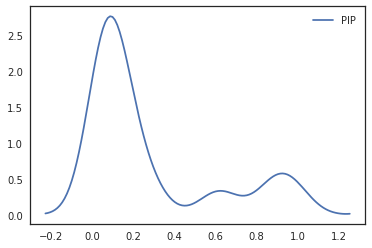

In [252]:
sns.kdeplot(df_proba.PIP)